Projeto básico de previsão

In [51]:

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta

nome_projeto = 'previsao'

IMPORTAR DADOS

In [52]:
def obter_dados_de_arquivo(nome_arquivo):

    """
    Esta função lê os dados de um arquivo ".parquet" e os retorna.

    Args:
        nome_arquivo (str): nome do arquivo .parquet que será buscado na pasta "dados/".

    Returns:
        pandas.DataFrame: Uma tabela de dados (DataFrame) lida do arquivo.
                          Retorna None se houver algum erro ao ler o arquivo.
    """
    
    caminho_arquivo = os.getcwd().split(nome_projeto)[0] + nome_projeto + '/dados/' + nome_arquivo

    try:
        dados = pd.read_parquet(caminho_arquivo)
        print(f'Dados lidos com sucesso do arquivo: "{nome_arquivo}"')
        return dados
    except FileNotFoundError:
        print(f'Arquivo "{nome_arquivo}" não encontrado')
        return None
    except Exception as e:
        print(f"Ocorreu um erro ao ler o arquivo {e}")
        return None

IMPORTAR OS DADOS

In [53]:
#%%
if __name__ == "__main__":

    # Aqui é onde o script é executado se você rodar diretamente este arquivo
    nome_arquivo = '2020_macacos_cbr_tma.parquet'  # Assumindo que seu arquivo se chama assim
    dados_obtidos = obter_dados_de_arquivo(nome_arquivo)

    '''
    if dados_obtidos is not None:
        #print("\nPrimeiras linhas dos dados obtidos:")
        #print(dados_obtidos.head())  # Mostra as primeiras linhas da tabela de dados

        print('\nVariáveis do arquivo: \n')
        for item in dados_obtidos.columns:
            print(item)
    '''

Dados lidos com sucesso do arquivo: "2020_macacos_cbr_tma.parquet"


GRÁFICOS DAS VARIÁVEIS IMPORTADAS

In [ ]:
fig, axes = plt.subplots(nrows=11, ncols= 3, figsize = (11,35))

dados_obtidos.plot(subplots= True, ax = axes)

VARIÁVEIS

In [56]:
#dados_obtidos.head()

In [57]:
def deslocamento_temporal(x, y, horizonte):
    '''
        Desloca a série "y" em "horizonte" horas da série "x"
    '''
    
    from datetime import timedelta

    x = x.dropna()
    y = y.dropna()

    y = y[y.index.isin(y.index + timedelta(hours= horizonte))]
    x = x[x.index.isin(x.index - timedelta(hours= horizonte))]

    return x,y

In [58]:
x, y = deslocamento_temporal(dados_obtidos.wind_speed_1_ave, dados_obtidos.wind_speed_1_ave, horizonte= 1)

print(x.to_frame().head(10), f'tamanho: {len(x)}')
print(y.to_frame().head(10), f'tamanho: {len(y)}')

                     wind_speed_1_ave
date_time                            
2020-01-01 00:00:00             5.038
2020-01-01 00:10:00             4.758
2020-01-01 00:20:00             4.569
2020-01-01 00:30:00             4.181
2020-01-01 00:40:00             4.662
2020-01-01 00:50:00             4.199
2020-01-01 01:00:00             4.839
2020-01-01 01:10:00             5.740
2020-01-01 01:20:00             5.929
2020-01-01 01:30:00             6.400 tamanho: 52696
                     wind_speed_1_ave
date_time                            
2020-01-01 01:00:00             4.839
2020-01-01 01:10:00             5.740
2020-01-01 01:20:00             5.929
2020-01-01 01:30:00             6.400
2020-01-01 01:40:00             5.445
2020-01-01 01:50:00             5.163
2020-01-01 02:00:00             5.195
2020-01-01 02:10:00             4.608
2020-01-01 02:20:00             4.245
2020-01-01 02:30:00             3.953 tamanho: 52696


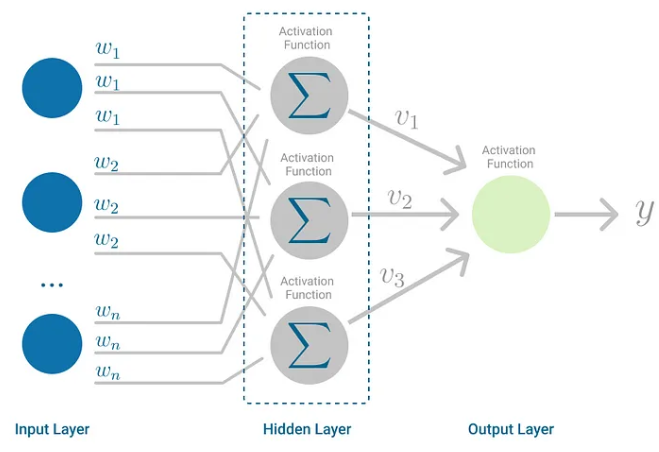

In [22]:
from IPython import display
display.Image("/home/mariana/Pictures/Screenshots/Screenshot from 2025-04-12 21-31-13.png")

In [ ]:
x.to_frame().head(100)

,wind_speed_1_ave
date_time,
2020-01-01 01:00:00,4.839
2020-01-01 01:10:00,5.740
2020-01-01 01:20:00,5.929
2020-01-01 01:30:00,6.400
2020-01-01 01:40:00,5.445
...,...
2020-01-01 16:50:00,4.159
2020-01-01 17:00:00,3.713
2020-01-01 17:10:00,4.660


In [60]:
def MLPtrain(X_train, Y_train, best_param = {'n_layers': 2, 'n_units_l0': 8, 'n_units_l1':5, 'activation': 'relu'}):
    
    from sklearn.neural_network import MLPRegressor as MLP
    from datetime import timedelta
    from sklearn.metrics import mean_squared_error
    
    #### Configurações da rede

    # EXEMPLO: hidden_layer_sizes = (5,8) # 2 Camadas com 5 e 8 neurônios respectivamente
    hidden_layer_sizes = tuple( 
                              [ 
                              best_param['n_units_l'+str(neuronios)] for neuronios in range(best_param['n_layers']) 
                              ] 
                              )
    
    activation = best_param['activation']
    
    '''
    <<<<< Funções de ativação: >>>>>
         
    ‘identity’, no-op activation, useful to implement linear bottleneck, returns f(x) = x
     
    ‘logistic’, the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).
    
    ‘tanh’, the hyperbolic tan function, returns f(x) = tanh(x).
     
    ‘relu’, the rectified linear unit function, returns f(x) = max(0, x)
    '''
     
    learning_rate =  'constant'
    
    '''
    <<<<< Learning Rate: >>>>
     
    'constant’ is a constant learning rate given by ‘learning_rate_init’.
     
    ‘invscaling’ gradually decreases the learning rate learning_rate_ at each time step ‘t’ using an inverse scaling exponent of ‘power_t’. effective_learning_rate = learning_rate_init / pow(t, power_t)
     
    ‘adaptive’ keeps the learning rate constant to ‘learning_rate_init’ as long as training loss keeps decreasing. Each time two consecutive epochs fail to decrease training loss by at least tol, or fail to increase validation score by at least tol if ‘early_stopping’ is on, the current learning rate is divided by 5.
    '''
     
    batch_size = 10                     # Tamanho do batch
    learning_rate_init = 0.001          # Learning rate/Taxa de aprendizado.
    max_iter = 500                      # Épocas.
    #random_state = None                 # Inicialização aleatória de pesos e bias.
    tol = 1/10**7                       # Tolerância para o aprendizado após n_iter_no_change.
    early_stopping = True               # Para antecipadamente 
    n_iter_no_change = 10               # para após n_iter_no_change dentro de tol
    

    #### Treinar a rede


    regress = MLP(
                  hidden_layer_sizes = hidden_layer_sizes, activation = activation,
                  batch_size = batch_size, learning_rate = learning_rate, 
                  learning_rate_init = learning_rate_init, max_iter = max_iter, 
                  tol = tol, early_stopping = early_stopping,
                  n_iter_no_change = n_iter_no_change
                  ).fit( X_train.values, Y_train.values.ravel() ) # X_train.values, Y_train.values.ravel() 
    
    
    return regress

In [59]:
x = x.to_frame()  # Transforma de série para dataframe
y = y.to_frame()  # Transforma de série para dataframe

ADICIONAR O BIAS

In [61]:
x['bias'] = 1

print(x)

                     wind_speed_1_ave  bias
date_time                                  
2020-01-01 00:00:00             5.038     1
2020-01-01 00:10:00             4.758     1
2020-01-01 00:20:00             4.569     1
2020-01-01 00:30:00             4.181     1
2020-01-01 00:40:00             4.662     1
...                               ...   ...
2020-12-31 22:10:00             8.086     1
2020-12-31 22:20:00             7.843     1
2020-12-31 22:30:00             7.802     1
2020-12-31 22:40:00             7.767     1
2020-12-31 22:50:00             7.289     1

[52696 rows x 2 columns]


DIVIDIR OS DADOS EM TREINAMENTO E OPERAÇÃO

In [62]:
x_train = x[0:int(0.7*len(x))]
y_train = y[0:int(0.7*len(y))]

x_oper = x[int(0.7*len(x))::]
y_valid = y[int(0.7*len(y))::]

TREINAMENTO

In [63]:
#best_param = {'n_layers': 2, 'n_units_l0': 8, 'n_units_l1':5, 'activation': 'relu'}

ANN = MLPtrain(x_train, y_train)

PREVISÃO

In [42]:
y_predicted = ANN.predict(x_oper)

/home/mariana/Documents/GitHub/previsao/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(


In [43]:
y_predicted = pd.DataFrame(y_predicted, x_oper.index + timedelta(hours= 1), columns=['previsao'] )

In [45]:
#y_predicted.head(10)

In [48]:
df = pd.concat([y_valid, y_predicted], axis = 1)

df['dif'] = df[df.columns[0]] - df[df.columns[1]]

df.head(100)

,wind_speed_1_ave,previsao,dif
date_time,,,
2020-09-13 05:10:00,8.783,8.096893,0.686107
2020-09-13 05:20:00,7.716,8.963771,-1.247771
2020-09-13 05:30:00,6.943,9.622270,-2.679270
2020-09-13 05:40:00,6.810,9.527192,-2.717192
2020-09-13 05:50:00,7.483,9.333516,-1.850516
...,...,...,...
2020-09-13 21:00:00,5.941,9.624911,-3.683911
2020-09-13 21:10:00,6.054,9.607304,-3.553304
2020-09-13 21:20:00,5.880,9.467329,-3.587329


In [49]:
df.describe()

,wind_speed_1_ave,previsao,dif
count,15809.000000,15809.000000,15809.000000
mean,8.016219,7.879934,0.136285
std,1.760727,1.439727,1.218462
min,3.413000,3.739630,-5.769245
25%,6.690000,6.816659,-0.647220
50%,7.927000,7.754840,0.089046
75%,9.186000,8.794744,0.903018
max,15.717000,14.542526,5.395761


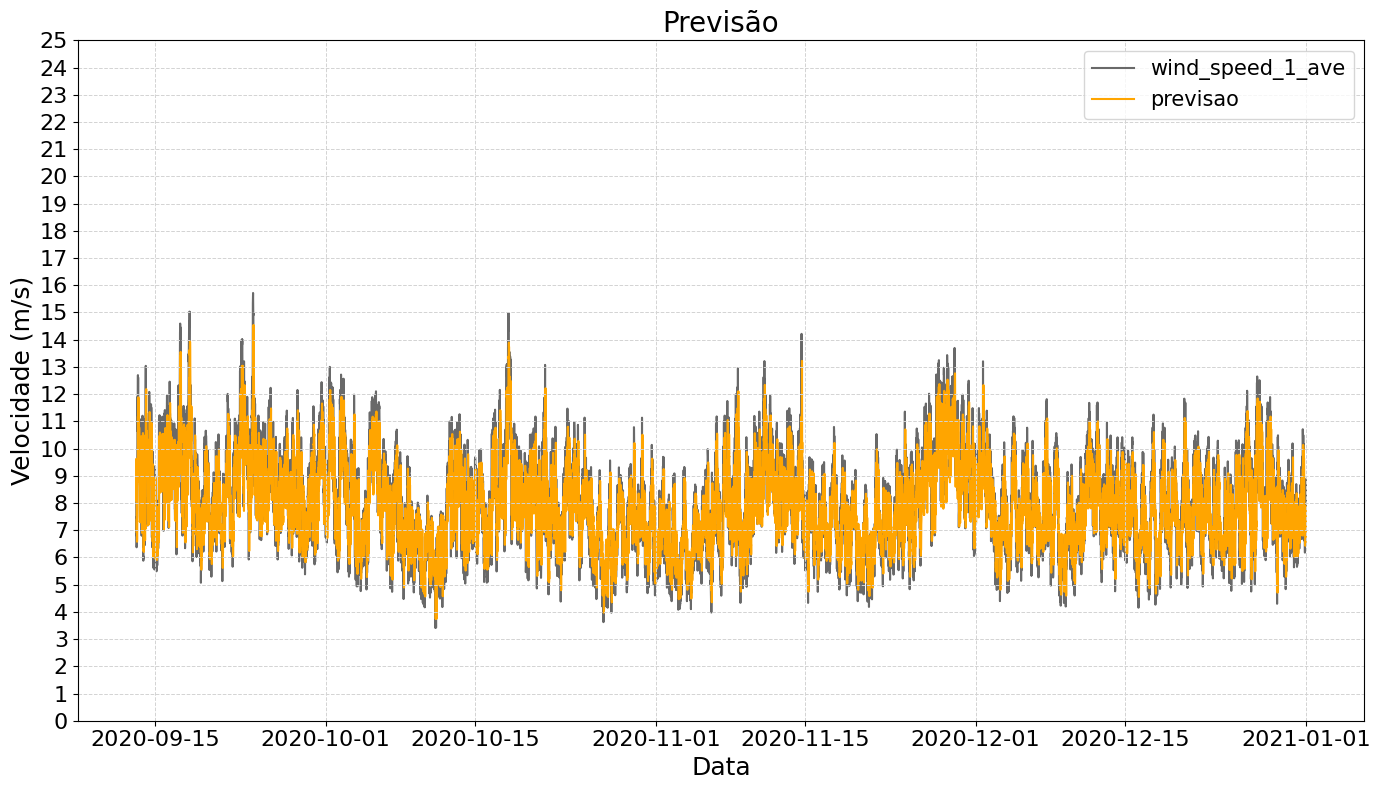

In [50]:
plt.figure(figsize=(14, 8))
plt.plot(df.index, df.wind_speed_1_ave, color='dimgrey',  zorder=0)
plt.plot(df.index, df.previsao, color='orange',  zorder=1)
    
#colors = cm.tab10.colors  # Paleta de cores

plt.title(f'Previsão', fontsize=20)
plt.xlabel('Data', fontsize=18)
plt.ylabel('Velocidade (m/s)', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(np.arange(0,26, 1), fontsize=16)
plt.grid(color='lightgrey', linestyle='--', linewidth=0.7, zorder=2)
#plt.legend(fontsize=15, loc = 'upper right', bbox_to_anchor=(1.25, 1))
legenda = df.columns
plt.legend(legenda, fontsize=15, loc = 'upper right')
plt.tight_layout()
plt.show()

In [ ]:

import numpy as NP
import matplotlib.pyplot as PLT


class TaylorDiagram(object):
    """
    Taylor diagram.
    Plot model standard deviation and correlation to reference (data)
    sample in a single-quadrant polar plot, with r=stddev and
    theta=arccos(correlation).
    """

    def __init__(self, refstd,
                 fig=None, rect=111, label='_', srange=(0, 1.5), extend=False):
        """
        Set up Taylor diagram axes, i.e. single quadrant polar
        plot, using `mpl_toolkits.axisartist.floating_axes`.
        Parameters:
        * refstd: reference standard deviation to be compared to
        * fig: input Figure or None
        * rect: subplot definition
        * label: reference label
        * srange: stddev axis extension, in units of *refstd*
        * extend: extend diagram to negative correlations
        """

        from matplotlib.projections import PolarAxes
        import mpl_toolkits.axisartist.floating_axes as FA
        import mpl_toolkits.axisartist.grid_finder as GF

        self.refstd = refstd            # Reference standard deviation

        tr = PolarAxes.PolarTransform()

        # Correlation labels
        rlocs = NP.array([0, 0.2, 0.4, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 1])
        if extend:
            # Diagram extended to negative correlations
            self.tmax = NP.pi
            rlocs = NP.concatenate((-rlocs[:0:-1], rlocs))
        else:
            # Diagram limited to positive correlations
            self.tmax = NP.pi/2
        tlocs = NP.arccos(rlocs)        # Conversion to polar angles
        gl1 = GF.FixedLocator(tlocs)    # Positions
        tf1 = GF.DictFormatter(dict(zip(tlocs, map(str, rlocs))))

        # Standard deviation axis extent (in units of reference stddev)
        self.smin = srange[0] * self.refstd
        self.smax = srange[1] * self.refstd

        ghelper = FA.GridHelperCurveLinear(
            tr,
            extremes=(0, self.tmax, self.smin, self.smax),
            grid_locator1=gl1, tick_formatter1=tf1)

        if fig is None:
            fig = PLT.figure()

        ax = FA.FloatingSubplot(fig, rect, grid_helper=ghelper)
        fig.add_subplot(ax)

        # Adjust axes
        ax.axis["top"].set_axis_direction("bottom")   # "Angle axis"
        ax.axis["top"].toggle(ticklabels=True, label=True)
        ax.axis["top"].major_ticklabels.set_axis_direction("top")
        ax.axis["top"].label.set_axis_direction("top")
        ax.axis["top"].label.set_text("Correlation")

        ax.axis["left"].set_axis_direction("bottom")  # "X axis"
        ax.axis["left"].label.set_text("Standard deviation")

        ax.axis["right"].set_axis_direction("top")    # "Y-axis"
        ax.axis["right"].toggle(ticklabels=True)
        ax.axis["right"].major_ticklabels.set_axis_direction(
            "bottom" if extend else "left")

        if self.smin:
            ax.axis["bottom"].toggle(ticklabels=False, label=False)
        else:
            ax.axis["bottom"].set_visible(False)          # Unused

        self._ax = ax                   # Graphical axes
        self.ax = ax.get_aux_axes(tr)   # Polar coordinates

        # Add reference point and stddev contour
        l, = self.ax.plot([0], self.refstd, 'k*',
                          ls='', ms=10, label=label)
        t = NP.linspace(0, self.tmax)
        r = NP.zeros_like(t) + self.refstd
        self.ax.plot(t, r, 'k--', label='_')

        # Collect sample points for latter use (e.g. legend)
        self.samplePoints = [l]

    def add_sample(self, stddev, corrcoef, *args, **kwargs):
        """
        Add sample (*stddev*, *corrcoeff*) to the Taylor
        diagram. *args* and *kwargs* are directly propagated to the
        `Figure.plot` command.
        """

        l, = self.ax.plot(NP.arccos(corrcoef), stddev,
                          *args, **kwargs)  # (theta, radius)
        self.samplePoints.append(l)

        return l

    def add_grid(self, *args, **kwargs):
        """Add a grid."""

        self._ax.grid(*args, **kwargs)

    def add_contours(self, levels=5, **kwargs):
        """
        Add constant centered RMS difference contours, defined by *levels*.
        """

        rs, ts = NP.meshgrid(NP.linspace(self.smin, self.smax),
                             NP.linspace(0, self.tmax))
        # Compute centered RMS difference
        rms = NP.sqrt(self.refstd**2 + rs**2 - 2*self.refstd*rs*NP.cos(ts))

        contours = self.ax.contour(ts, rs, rms, levels, **kwargs)

        return contours


def mytest():
    
    week = 40
    
    refstd = predict.Y.std(ddof = 1)
    
    
    df = predict[predict.Y.notna()].astype('float')
    
    models = [df[X].dropna(axis = 0, how = 'any')
              for X in df.drop(['Y'], axis = 1).columns]
    
    samples = np.array([ 
                        [ i.std(ddof = 1), 
                         np.corrcoef(df.Y[df.Y.index.isin(i.index)], i)[0,1] ] 
                        for i in models
                       ])
    
   # del i
    
    df = df.asfreq('H')
        
    fig = PLT.figure(figsize=(10, 4))

    ax1 = fig.add_subplot(1, 2, 1, xlabel='Data', ylabel='GHI (W/m²)')
    plt.title('Medicão x Previsão')

    # Taylor diagram
    dia = TaylorDiagram(refstd, fig=fig, rect=122, label="Referência",
                        srange=(0.5, 1.5))

    colors = PLT.matplotlib.cm.jet(NP.linspace(0, 1, len(samples)))

    ax1.plot(predict.index[predict.index.isocalendar().week == week], predict.Y[predict.index.isocalendar().week == week], 'ko', label='Piranômetro')

    plt.xticks = pd.date_range(start = predict.index[predict.index.isocalendar().week == week][0],
                               end = predict.index[predict.index.isocalendar().week == week][-1],
                               freq = '24H')


    for i, m in enumerate(models):
        ax1.plot(m[m.index.isocalendar().week == week].index, m[m.index.isocalendar().week == week],
                 c=colors[i], label=m.name)
    ax1.legend(numpoints=1, prop=dict(size='small'), loc='best')
    

    
    # Add the models to Taylor diagram
    for i, (stddev, corrcoef) in enumerate(samples):
        dia.add_sample(stddev, corrcoef,
                       marker='$%d$' % (i+1), ms=10, ls='',
                       mfc=colors[i], mec=colors[i],
                       #label="Model %d" % (i+1))
                       label = models[i].name)
    # Add grid
    dia.add_grid()

    # Add RMS contours, and label them
    contours = dia.add_contours(colors='0.5')
    PLT.clabel(contours, inline=1, fontsize=10, fmt='%.2f')

    # Add a figure legend
    fig.legend(dia.samplePoints,
               [ p.get_label() for p in dia.samplePoints ],
               numpoints=1, prop=dict(size='small'), loc='upper right', fontsize = 5)
    
    plt.title('Diagrama de Taylor \nHorizonte: '+str(horizonte) + 'h')
    plt.show()

    return dia

def test1():
    """Display a Taylor diagram in a separate axis."""

    # Reference dataset
    x = NP.linspace(0, 4*NP.pi, 100)
    data = NP.sin(x)
    refstd = data.std(ddof=1)           # Reference standard deviation
    
    #data = analise.GHI_previsao
    
    
    # Generate models
    m1 = data + 0.2*NP.random.randn(len(x))     # Model 1
    m2 = 0.8*data + .1*NP.random.randn(len(x))  # Model 2
    m3 = NP.sin(x-NP.pi/10)                     # Model 3

    # Compute stddev and correlation coefficient of models
    samples = NP.array([ [m.std(ddof=1), NP.corrcoef(data, m)[0, 1]]
                         for m in (m1, m2, m3)])

    fig = PLT.figure(figsize=(10, 4))

    ax1 = fig.add_subplot(1, 2, 1, xlabel='X', ylabel='Y')
    # Taylor diagram
    dia = TaylorDiagram(refstd, fig=fig, rect=122, label="Reference",
                        srange=(0.5, 1.5))

    colors = PLT.matplotlib.cm.jet(NP.linspace(0, 1, len(samples)))

    ax1.plot(x, data, 'ko', label='Data')
    for i, m in enumerate([m1, m2, m3]):
        ax1.plot(x, m, c=colors[i], label='Model %d' % (i+1))
    ax1.legend(numpoints=1, prop=dict(size='small'), loc='best')

    # Add the models to Taylor diagram
    for i, (stddev, corrcoef) in enumerate(samples):
        dia.add_sample(stddev, corrcoef,
                       marker='$%d$' % (i+1), ms=10, ls='',
                       mfc=colors[i], mec=colors[i],
                       label="Model %d" % (i+1))

    # Add grid
    dia.add_grid()

    # Add RMS contours, and label them
    contours = dia.add_contours(colors='0.5')
    PLT.clabel(contours, inline=1, fontsize=10, fmt='%.2f')

    # Add a figure legend
    fig.legend(dia.samplePoints,
               [ p.get_label() for p in dia.samplePoints ],
               numpoints=1, prop=dict(size='small'), loc='upper right')

    return dia


def test2(stdref = 48.491, samples = [[25.939, 0.385, "Model A"],
                                      [29.593, 0.509, "Model B"],
                                      [33.125, 0.585, "Model C"]]):
    """
    Climatology-oriented example (after iteration w/ Michael A. Rawlins).
    """

    fig = PLT.figure()

    dia = TaylorDiagram(stdref, fig=fig, label='Reference', extend=True)
    dia.samplePoints[0].set_color('r')  # Mark reference point as a red star

    # Add models to Taylor diagram
    for i, (stddev, corrcoef, name) in enumerate(samples):
        dia.add_sample(stddev, corrcoef,
                       marker='$%d$' % (i+1), ms=10, ls='',
                       mfc='k', mec='k',
                       label=name)

    # Add RMS contours, and label them
    contours = dia.add_contours(levels=5, colors='0.5')  # 5 levels in grey
    PLT.clabel(contours, inline=1, fontsize=10, fmt='%.0f')

    dia.add_grid()                                  # Add grid
    dia._ax.axis[:].major_ticks.set_tick_out(True)  # Put ticks outward

    # Add a figure legend and title
    fig.legend(dia.samplePoints,
               [ p.get_label() for p in dia.samplePoints ],
               numpoints=1, prop=dict(size='small'), loc='upper right')
    fig.suptitle("Taylor diagram", size='x-large')  # Figure title

    return dia


In [ ]:
df.std()

wind_speed_1_ave    1.760727
previsao            1.439727
dif                 1.218462
dtype: float64

In [ ]:
df.corr().values[0,1]

np.float64(2.727489638354861)

/tmp/ipykernel_26559/23857997.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dia = test2(stdref= df.std()[0], samples=[[df.std()[1], df.corr().values[0,1], "Modelo A"]])
/tmp/ipykernel_26559/883405619.py:33: MatplotlibDeprecationWarning: Passing `apply_theta_transforms=True` (the default) is deprecated since Matplotlib 3.9. Support for this will be removed in Matplotlib in 3.11. To prevent this warning, set `apply_theta_transforms=False`, and make sure to shift theta values before being passed to this transform.
  tr = PolarAxes.PolarTransform()
/tmp/ipykernel_26559/883405619.py:297: MatplotlibDeprecationWarning: Passing `apply_theta_transforms=True` (the default) is deprecated since Matplotlib 3.9. Support for this will be removed in Matplotlib in 3.11. To prevent this warning, set `apply_theta_

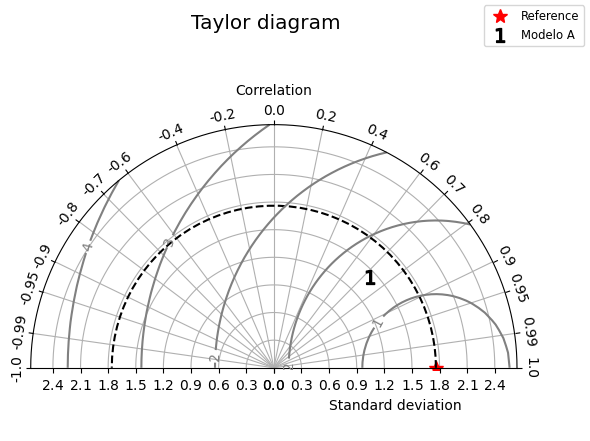

In [103]:
if __name__ == '__main__':

    #dia = test1()

    #samples = [[df.std()[1], df.corr()[0,1], "Model A"]]
    #dia = test2(stdref= df.std()[0])

    dia = test2(stdref= df.std()[0], samples=[[df.std()[1], df.corr().values[0,1], "Modelo A"]])

    PLT.show()